<a href="https://colab.research.google.com/github/mmartin46/Criminal_Analysis_Project/blob/main/DisneyLandReviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

John 3:5

In [2]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 7.6 MB/s eta 0:00:00


In [3]:
import pandas as pd
import altair as alt
from altair import Chart, X, Y, Color, Scale
import datetime as dt
import matplotlib.pyplot as plt
from pandas.core.common import random_state
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

In [7]:
ddf = pd.read_csv('/content/DisneylandReviews.csv', encoding='latin-1')

In [48]:
def filter_dataset(df):
  df.dropna(inplace=True)
  df = df[df['Year_Month'] != 'missing']
  return df

df = filter_dataset(ddf)

In [52]:
df_copy = df.copy()

In [62]:
df_copy['Year'] = 0

In [63]:
for index, row in df_copy.iterrows():
    row['Year'] = row['Year_Month'][:4]

In [77]:
df_copy['Year'] = df_copy['Year_Month']

In [84]:
df_copy['Year'] = df_copy.Year.str[:4]

In [85]:
review_count = (df_copy.groupby('Year', as_index=False)['Review_Text']).count()

In [86]:
review_count

,Year,Review_Text
0,2010,143
1,2011,1984
2,2012,4342
3,2013,4717
4,2014,5301
5,2015,6979
6,2016,6599
7,2017,5195
8,2018,3997
9,2019,786


<ipython-input-92-efa7805b4873>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


[Text(0.5, 0, 'Yearly Total'), Text(0, 0.5, '# of Reviews')]

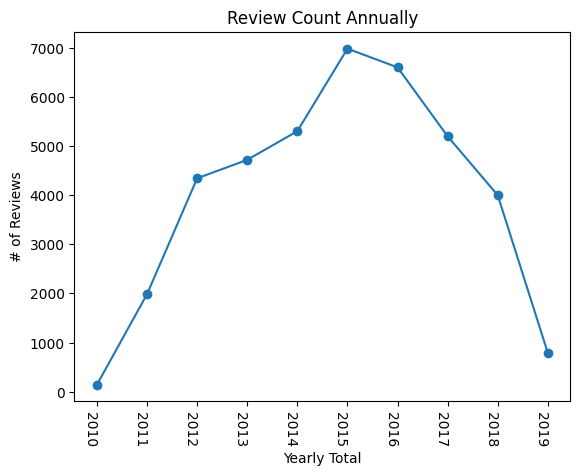

In [92]:
fig, ax = plt.subplots()

ax.scatter(review_count['Year'], review_count['Review_Text'])
ax.plot(review_count['Year'], review_count['Review_Text'])
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=-90,
    fontsize=10,
    rotation_mode='default',
    ha='right'
)
ax.set_title('Review Count Annually')
ax.set(
    xlabel='Yearly Total',
    ylabel='# of Reviews'
)

In [100]:
neg_rev = df_copy['Review_Text'].str.count('bad') | df_copy['Review_Text'].str.count('boring')
pos_rev = df_copy['Review_Text'].str.count('fun') | df_copy['Review_Text'].str.count('happy') |  df_copy['Review_Text'].str.count('good')

In [121]:
net_rev = df_copy['Review_Text'].str.count('decent') | df_copy['Review_Text'].str.count('okay') |  df_copy['Review_Text'].str.count('fine')

In [95]:
df_copy['Year']

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Year
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019
...,...,...,...,...,...,...,...
42113,92198076,4,2011-1,United Kingdom,Although our pick up was prompt the taxi drive...,Disneyland_Paris,2011
42114,92061774,4,2011-1,Germany,Just returned from a 4 days family trip to Dis...,Disneyland_Paris,2011
42115,91995748,1,2010-12,United Kingdom,We spent the 20 Dec 2010 in the Disney park an...,Disneyland_Paris,2010
42116,91984642,2,2010-12,United Kingdom,Well I was really looking forward to this trip...,Disneyland_Paris,2010


In [175]:
def set_time_plot(Time):
  """Shows a plt chart based on the time"""

  # Make sure the time can be converted to a string
  try:
    Time = str(Time)
  except:
    print("Time: is invalid")

  rev = pd.DataFrame({
      Time : df_copy[Time],
      'Negative' : neg_rev,
      'Positive' : pos_rev,
      'Neutral' : net_rev
  })

  rev.groupby(Time, as_index=False)['Negative'].sum().iloc[:,1]

  rev = pd.DataFrame({
    Time : list(rev[Time].unique()),
    'Negative': rev.groupby(Time, as_index=False)['Negative'].sum().iloc[:,1],
    'Positive': rev.groupby(Time, as_index=False)['Positive'].sum().iloc[:,1],
    'Neutral' : rev.groupby(Time, as_index=False)['Neutral'].sum().iloc[:,1]
  })

  # Determine hwo the plot is shown based on the time-frame.
  if Time == 'Year':
    fig, ax = plt.subplots()
    ax.set_xlabel('Years of Review')
    ax.set_title('Review Count Annually')
  elif Time == 'Year_Month':
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.set_xlabel('Months of Review')
    ax.set_title('Review Count Monthly')


  COLORS = [
      'turquoise',
      'deepskyblue',
      'blue'
  ]

  ax.plot([], [], label='Negative', color=COLORS[0])
  ax.plot([], [], label='Positive', color=COLORS[1])
  ax.plot([], [], label='Neutral', color=COLORS[2])

  ax.stackplot(rev[Time], rev['Negative'],
                            rev['Positive'],
                            rev['Neutral'], colors=COLORS)

  ax.set_xticklabels(
      ax.get_xticklabels(),
      rotation=-90,
      fontsize=10,
      rotation_mode='default',
      ha='right'
  )

  ax.set(
      ylabel='# of Reviews'
  )
  ax.legend()
  return rev

<ipython-input-175-1a538ddb567b>:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


,Year,Negative,Positive,Neutral
0,2019,20,81,5
1,2018,183,1205,108
2,2017,350,2317,165
3,2016,446,2815,211
4,2015,436,2985,214
5,2014,511,3638,223
6,2013,440,3330,216
7,2012,406,2674,201
8,2011,291,2076,155
9,2010,52,383,42


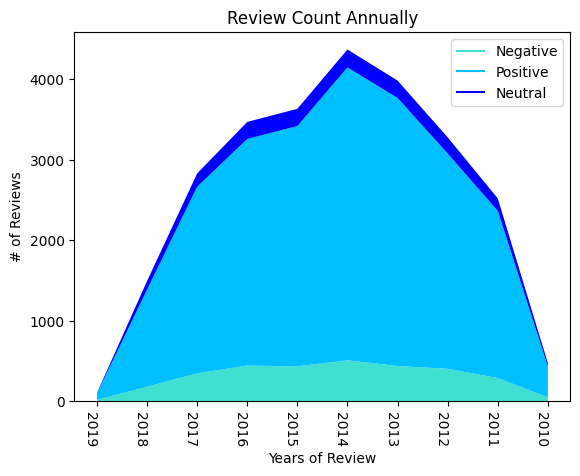

In [176]:
set_time_plot('Year')

<ipython-input-175-1a538ddb567b>:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


,Year_Month,Negative,Positive,Neutral
0,2019-4,2,10,0
1,2019-5,2,13,0
2,2019-3,12,43,4
3,2018-9,0,1,0
4,2019-1,0,1,0
...,...,...,...,...
106,2010-3,15,90,14
107,2010-8,11,101,7
108,2010-7,17,117,12
109,2010-6,9,75,9


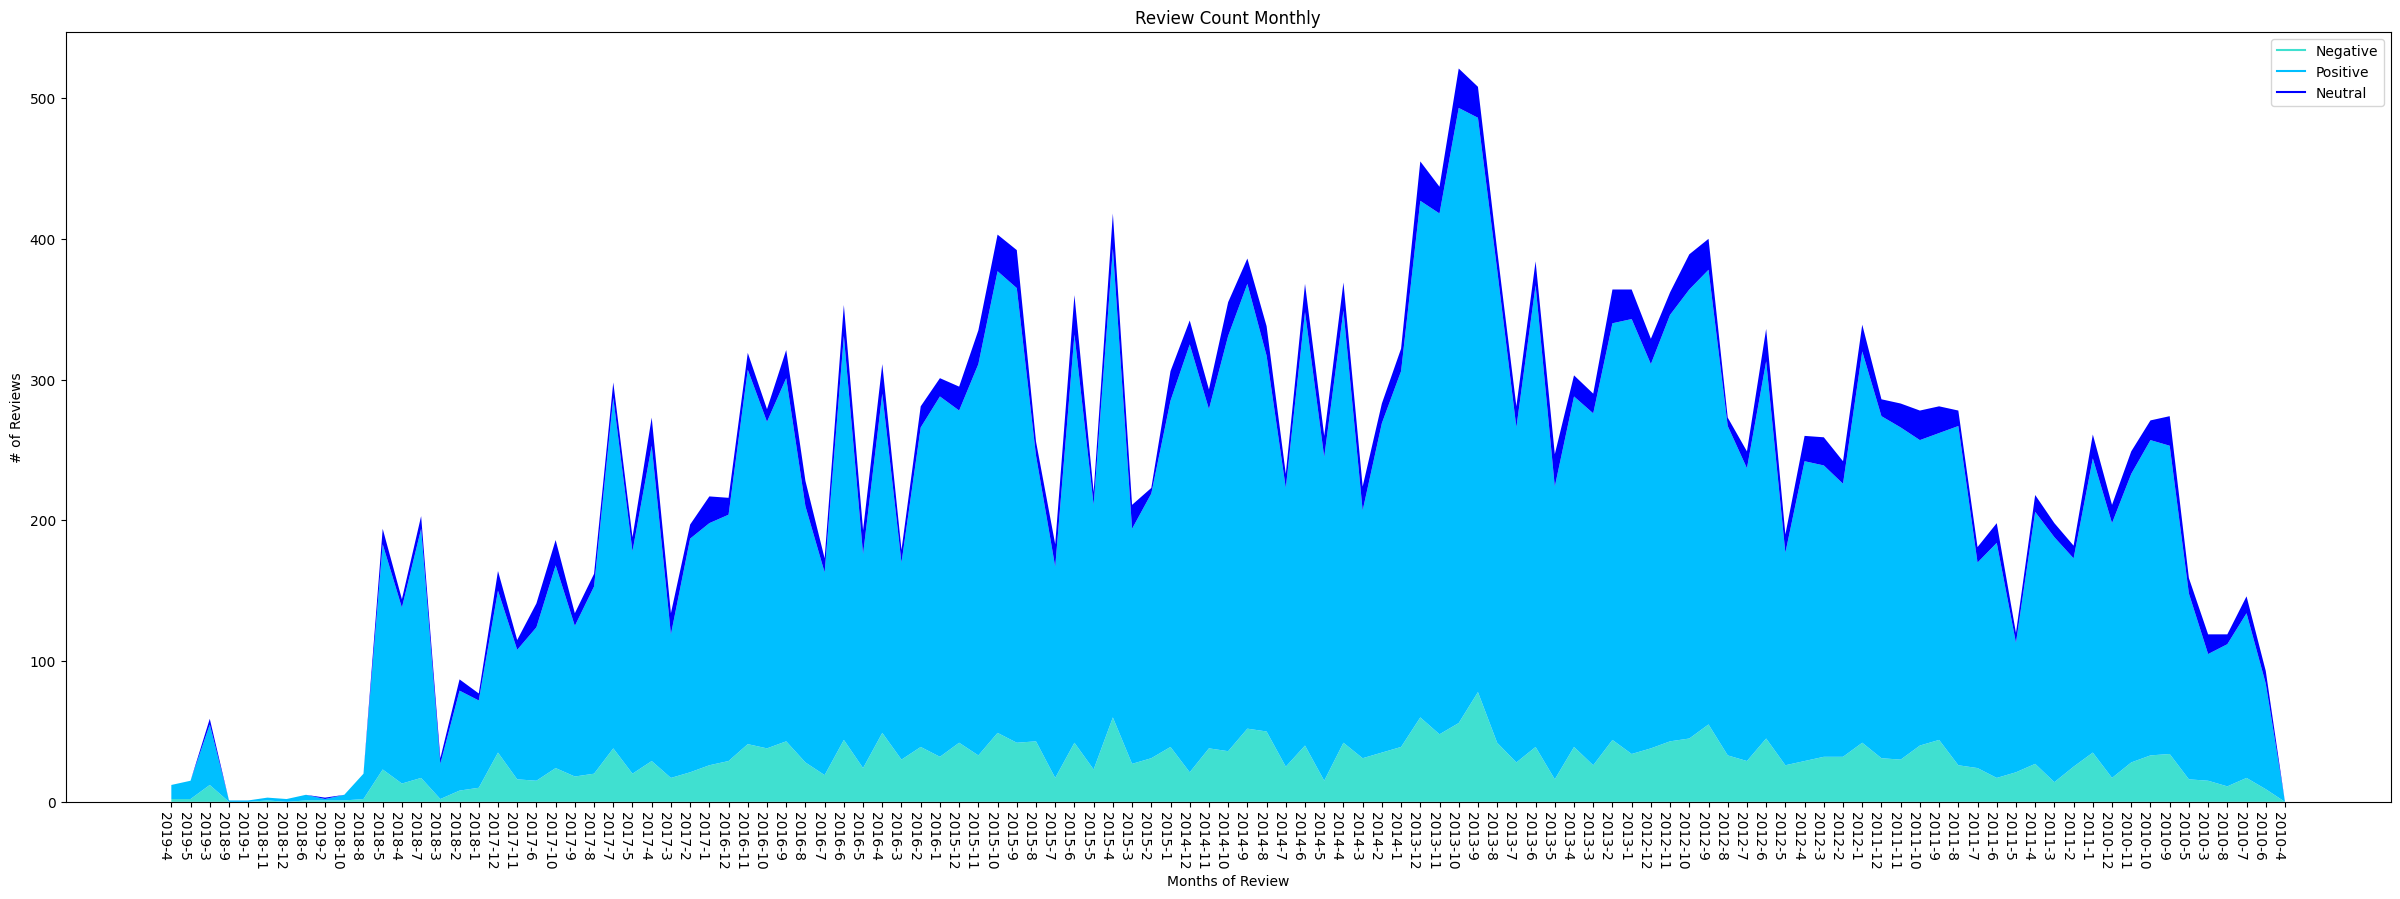

In [177]:
set_time_plot('Year_Month')